# Module 8 - Final Project 


**In this final project, you will demonstrate what you have learned in this class by applying a thorough data analysis to a data set of your choice.** 

As discussed on the discussion boards in the last two weeks, your data set should contain rich enough features and a good sample size so that you can apply the methods you have learned to derive some **insights** from the data. The ultimate goal of data analysis is to learn from the data so that we can form useful and actionable knowledge. 
 

Use this notebook for the analysis of your final project. **Your deliverables for the final project are:** 

 - **This notebook**: contains the **full** data science project life cycle as you have learned in the Intro class. 
   - Load your data, clean your data, include all the carpentry you need to put it into some shape for your later analysis. 
   - EDA: exploratory data analysis: this is where you do the univariate and multivariate analyses; visualize your data to understand the shape and associations in it. Plot densities, histograms, scatter plots, etc. Look for correlations, patterns, clusters, etc. 
   - Modeling and hypothesis testing: use any of the adequate techniques to see if you can model the influence of the variables on each other. You can try to reduce dimensionality, try to do regression analysis, hypothesis testing, etc. to see how variables affect each other. 
   - **Insights:** the point of data analysis to derive **insights** from your data. What do you see? What did you learn from the data? Did it answer your initial question or did it verify your hypothesis? 
   - **Presenting results**: Communicate your results effectively using visualization principles you have learned. 
   
   
   
 - A **pdf** file that contains a few slides to summarize your results: similar to the data vis course, create a pdf document that can contain up to 3-4 slides (**no more**) to present your results. 
 
 
 
 - Upload your data set to this folder (under exercises folder). 
 
 ---
 
 
 **You should have ample explanation and comments for all your data analysis in this notebook.** Think of it as a LAB notebook: imagine that you are creating a lab notebook for others to follow and learn from your analysis. You should have enough details so that somebody can recreate your analysis by following your descriptions and explanations. 
 
 Have a markdown cell before each code cell explaining **what** you are doing and **why** you are doing it. Have comments in the code cell. Have a markdown cell **after** every code cell explaining what you just found out by running that code cell before. 
 
 ---
 
 

#### This dataset includes data about the different pokemons that are seen on the show Pokemon, and this model predicts the legendary status of the various pokemon. 

#### A legendary pokemon is a pokemon which is stronger and faster when compared to the other regualar pokemon, and so I am trying to predict the legendary status of a pokemon based on their Power, Health, Attack, Defence, Speed.

## 1. Loading, Cleaning, Displaying Data 

In [30]:
library(ggplot2)
library(readr)  
library(dplyr)
library(GGally)
library(gridExtra)
library(ROCR)
library(caTools)
library(rpart)
library(caret)

In [31]:
#Loading data into dataframe
pokemon <- read.csv('pokemon.csv')
pokemon

S.No.,Name,Type1,Type2,Total,Hp,Attack,Defense,Sp_Attack,Sp_Defense,Speed,Generation,Legendary
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
4,Charmander,Fire,,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,FALSE
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,FALSE
7,Squirtle,Water,,314,44,48,65,50,64,43,1,FALSE
8,Wartortle,Water,,405,59,63,80,65,80,58,1,FALSE
9,Blastoise,Water,,530,79,83,100,85,105,78,1,FALSE


In [32]:
#Checking the dimensionality of the dataframe
dim(pokemon)

[1] 948  13

In [33]:
#Deleting columns from the dataframe
pokemon <- pokemon[,-c(4)]
pokemon

S.No.,Name,Type1,Total,Hp,Attack,Defense,Sp_Attack,Sp_Defense,Speed,Generation,Legendary
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,525,80,82,83,100,100,80,1,FALSE
4,Charmander,Fire,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,405,58,64,58,80,65,80,1,FALSE
6,Charizard,Fire,534,78,84,78,109,85,100,1,FALSE
7,Squirtle,Water,314,44,48,65,50,64,43,1,FALSE
8,Wartortle,Water,405,59,63,80,65,80,58,1,FALSE
9,Blastoise,Water,530,79,83,100,85,105,78,1,FALSE


In [34]:
#Renaming the columns of the dataframe
colnames(pokemon)[3] ="Type"
colnames(pokemon)[4] ="Power"
colnames(pokemon)[5] ="Health"
colnames(pokemon)[8] ="Special_Attack"
colnames(pokemon)[9] ="Special_Defense"
pokemon

S.No.,Name,Type,Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,525,80,82,83,100,100,80,1,FALSE
4,Charmander,Fire,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,405,58,64,58,80,65,80,1,FALSE
6,Charizard,Fire,534,78,84,78,109,85,100,1,FALSE
7,Squirtle,Water,314,44,48,65,50,64,43,1,FALSE
8,Wartortle,Water,405,59,63,80,65,80,58,1,FALSE
9,Blastoise,Water,530,79,83,100,85,105,78,1,FALSE


In [35]:
#Checking the summary of the dataframe
summary(pokemon)

     S.No.           Name               Type               Power      
 Min.   :  1.0   Length:948         Length:948         Min.   :175.0  
 1st Qu.:237.8   Class :character   Class :character   1st Qu.:327.2  
 Median :474.5   Mode  :character   Mode  :character   Median :450.0  
 Mean   :474.5                                         Mean   :429.7  
 3rd Qu.:711.2                                         3rd Qu.:505.0  
 Max.   :948.0                                         Max.   :754.0  
     Health           Attack          Defense       Special_Attack  
 Min.   :  1.00   Min.   :  5.00   Min.   :  5.00   Min.   : 10.00  
 1st Qu.: 50.00   1st Qu.: 55.00   1st Qu.: 50.00   1st Qu.: 50.00  
 Median : 65.00   Median : 75.00   Median : 70.00   Median : 65.00  
 Mean   : 69.54   Mean   : 77.96   Mean   : 72.91   Mean   : 71.25  
 3rd Qu.: 80.00   3rd Qu.:100.00   3rd Qu.: 90.00   3rd Qu.: 91.00  
 Max.   :255.00   Max.   :181.00   Max.   :230.00   Max.   :180.00  
 Special_Defense    

## 2. Exploratory Data Analysis 

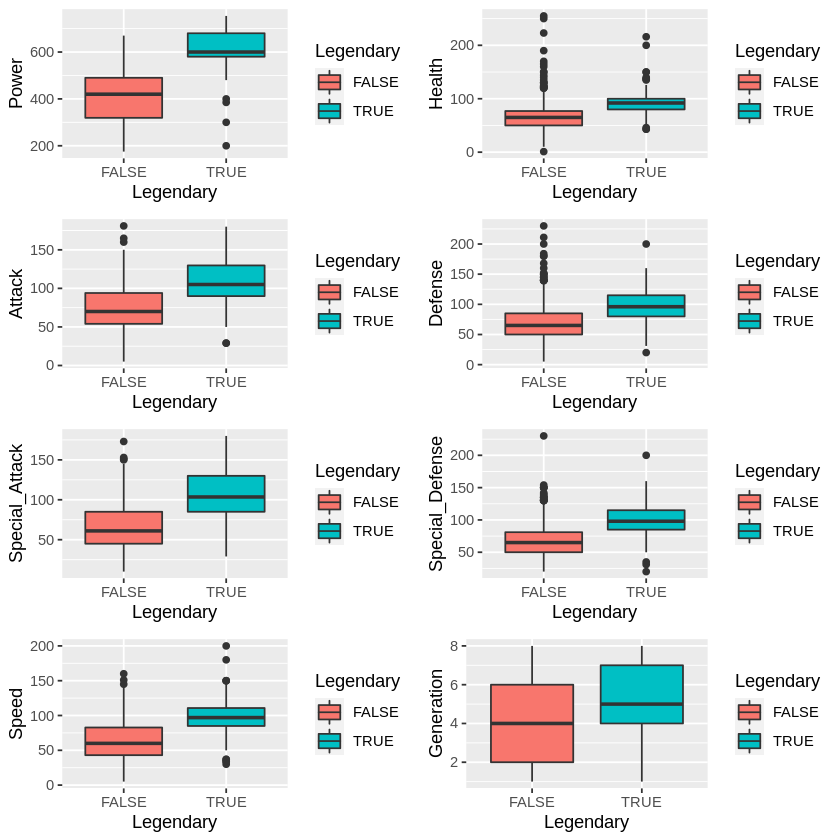

In [36]:
#Generating Boxplots for the dataset
pokemon$Legendary=as.factor(pokemon$Legendary)
power_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Power, fill=Legendary)) + geom_boxplot()
health_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Health, fill=Legendary)) + geom_boxplot()
attack_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Attack, fill=Legendary)) + geom_boxplot()
defense_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Defense, fill=Legendary)) + geom_boxplot()
special_attack_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Special_Attack, fill=Legendary)) + geom_boxplot()
special_defense_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Special_Defense, fill=Legendary)) + geom_boxplot()
speed_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Speed, fill=Legendary)) + geom_boxplot()
generation_legend_box <- ggplot(pokemon, aes(x=Legendary, y=Generation, fill=Legendary)) + geom_boxplot()

grid.arrange(power_legend_box, health_legend_box, attack_legend_box, defense_legend_box, special_attack_legend_box, 
             special_defense_legend_box, speed_legend_box, generation_legend_box, ncol=2, nrow=4)

In [37]:
#Deleting columns from the dataframe
dcpokemon <- pokemon[,-c(1,2,3)]
head(dcpokemon)

,Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,Legendary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,318,45,49,49,65,65,45,1,FALSE
2,405,60,62,63,80,80,60,1,FALSE
3,525,80,82,83,100,100,80,1,FALSE
4,309,39,52,43,60,50,65,1,FALSE
5,405,58,64,58,80,65,80,1,FALSE
6,534,78,84,78,109,85,100,1,FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



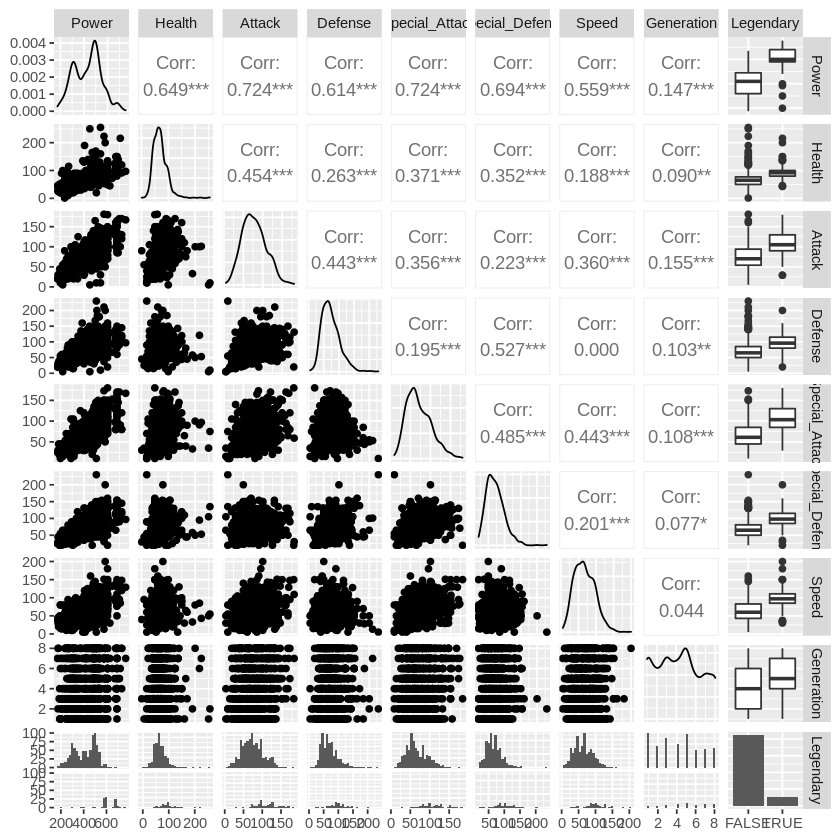

In [38]:
#Generating GGPair plots for the dataset
ggpairs(dcpokemon)

In [39]:
#Substituting False and True with 0's and 1's in the Legendary column
dcpokemon$legendary[dcpokemon$Legendary == "TRUE"] <- 1
dcpokemon$legendary[dcpokemon$Legendary == "FALSE"] <- 0
dcpokemon$Legendary <- NULL

head(dcpokemon)

,Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,legendary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,318,45,49,49,65,65,45,1,0
2,405,60,62,63,80,80,60,1,0
3,525,80,82,83,100,100,80,1,0
4,309,39,52,43,60,50,65,1,0
5,405,58,64,58,80,65,80,1,0
6,534,78,84,78,109,85,100,1,0


In [40]:
#Deleting columns from the dataframe
dcpokemonX = dcpokemon[, -c(9)]
head(dcpokemonX)

,Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,318,45,49,49,65,65,45,1
2,405,60,62,63,80,80,60,1
3,525,80,82,83,100,100,80,1
4,309,39,52,43,60,50,65,1
5,405,58,64,58,80,65,80,1
6,534,78,84,78,109,85,100,1


In [41]:
t(sapply(dcpokemon, class))

t(sapply(dcpokemon, typeof))

Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,legendary
integer,integer,integer,integer,integer,integer,integer,integer,numeric


Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,legendary
integer,integer,integer,integer,integer,integer,integer,integer,double


In [42]:
#Finding Correalation values for the dataframe columns
cor(dcpokemon[!names(dcpokemon) %in% c('id','date')])

,Power,Health,Attack,Defense,Special_Attack,Special_Defense,Speed,Generation,legendary
Power,1.0000000,0.64921177,0.7237548,6.135795e-01,0.7240692,0.69384587,5.588970e-01,0.14702050,0.5338914
Health,0.6492118,1.00000000,0.4542617,2.629044e-01,0.3705209,0.35196728,1.884538e-01,0.09049494,0.3276838
Attack,0.7237548,0.45426171,1.0000000,4.428675e-01,0.3555315,0.22277225,3.598157e-01,0.15454343,0.3521874
Defense,0.6135795,0.26290437,0.4428675,1.000000e+00,0.1946823,0.52656844,5.809137e-05,0.10295071,0.2903383
Special_Attack,0.7240692,0.37052087,0.3555315,1.946823e-01,1.0000000,0.48527000,4.429743e-01,0.10824826,0.4153558
Special_Defense,0.6938459,0.35196728,0.2227722,5.265684e-01,0.4852700,1.00000000,2.009403e-01,0.07668006,0.3633899
Speed,0.5588970,0.18845380,0.3598157,5.809137e-05,0.4429743,0.20094025,1.000000e+00,0.04391381,0.3656463
Generation,0.1470205,0.09049494,0.1545434,1.029507e-01,0.1082483,0.07668006,4.391381e-02,1.00000000,0.1329432
legendary,0.5338914,0.32768378,0.3521874,2.903383e-01,0.4153558,0.36338991,3.656463e-01,0.13294322,1.0000000


The highest correlation values are for the features Power and Special_Attack.

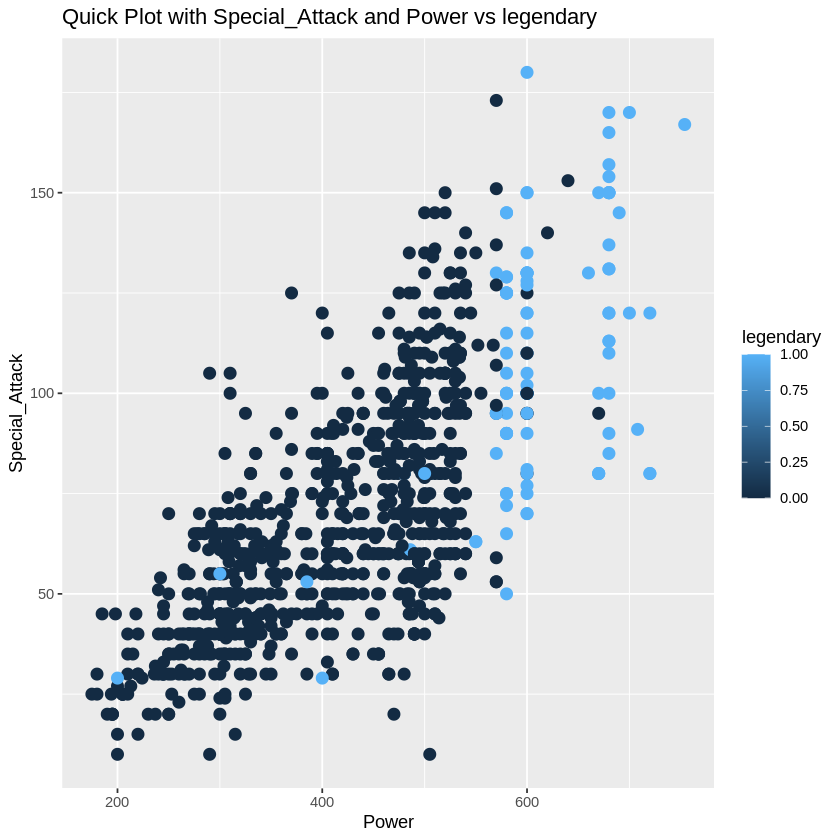

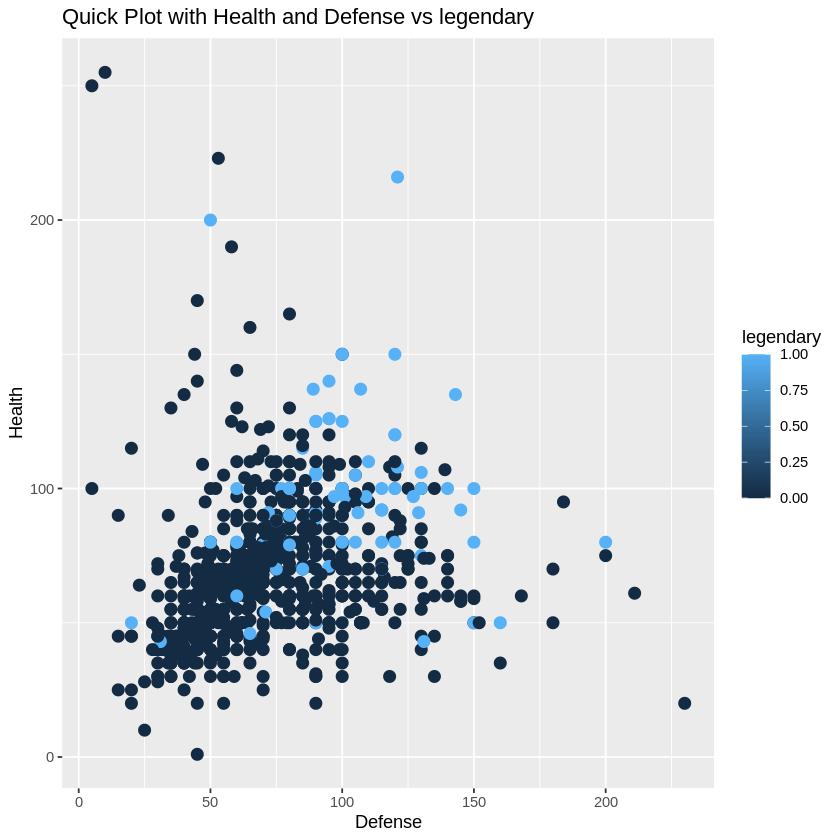

In [43]:
#Generating Q-Plot on the dataset
qplot(Power, Special_Attack, colour=legendary,data=dcpokemon, main="Quick Plot with Special_Attack and Power vs legendary")+geom_point(size=3)

qplot(Defense, Health, colour=legendary,data=dcpokemon, main="Quick Plot with Health and Defense vs legendary")+geom_point(size=3)

As we can see from the above graph, there is some kind of clustering. 

The points with legendary=1 mostly lie on higher values of power and special attack 

There are some anomalies, but they can be ignored.

## 3. MODELLING
### Logistic Regression

In [44]:
table(dcpokemon$legendary)


  0   1 
846 102 

In [45]:
846/(846+102)

[1] 0.8924051

Baseline accuracy = 89.24%

### Fit the logistic regression model:

In [46]:
pokemon_gen_log = glm(legendary ~ ., data=dcpokemon, family=binomial)
summary(pokemon_gen_log)


Call:
glm(formula = legendary ~ ., family = binomial, data = dcpokemon)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3001  -0.2141  -0.0392  -0.0049   5.3856  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -23.70179    2.18948 -10.825   <2e-16 ***
Power             0.22693   35.30975   0.006   0.9949    
Health           -0.18851   35.30976  -0.005   0.9957    
Attack           -0.20258   35.30975  -0.006   0.9954    
Defense          -0.18109   35.30976  -0.005   0.9959    
Special_Attack   -0.19496   35.30975  -0.006   0.9956    
Special_Defense  -0.18489   35.30975  -0.005   0.9958    
Speed            -0.16878   35.30976  -0.005   0.9962    
Generation        0.14827    0.08047   1.842   0.0654 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 647.40  on 947  degrees of freedom
Residual deviance: 247.14  on 939  deg

In [47]:
#Calculating the accuracy
probs = predict(pokemon_gen_log, type = "response", newdata=dcpokemon)
preds <- ifelse(probs > 0.5,1,0)
misClassificError <- mean (preds != dcpokemon$legendary)
print(paste('Accuracy',1-misClassificError))

[1] "Accuracy 0.964135021097046"


In [48]:
#Splitting the dataset into training and testing sets
split = sample.split(dcpokemon$legendary, SplitRatio=0.7)

pokemon_train_data = subset(dcpokemon, split==TRUE)

pokemon_test_data  = subset(dcpokemon, split==FALSE)

## 4. MODEL TESTING

In [49]:
pokemon_gen_train_log =  glm(legendary ~ ., data=pokemon_train_data, family=binomial)
probs1 = predict(pokemon_gen_train_log, type = "response", newdata=pokemon_test_data)
preds1 <- ifelse(probs1 > 0.5,1,0)

misClassificError1 <- mean (preds1 != pokemon_test_data$legendary)
print(paste('Accuracy',1-misClassificError1))

[1] "Accuracy 0.950877192982456"


In [50]:
table(pokemon_test_data$legendary,preds1>0.5)

   
    FALSE TRUE
  0   251    3
  1    11   20

In [54]:
print(paste('sens =', 251/(251+3)))
print(paste('spec =', 20/(20+11)))

[1] "sens = 0.988188976377953"
[1] "spec = 0.645161290322581"


Due to the class imbalance, we can check the accuracy by plotting a ROC curve, as it is insensitive to the imbalance

[1] 0.9503429

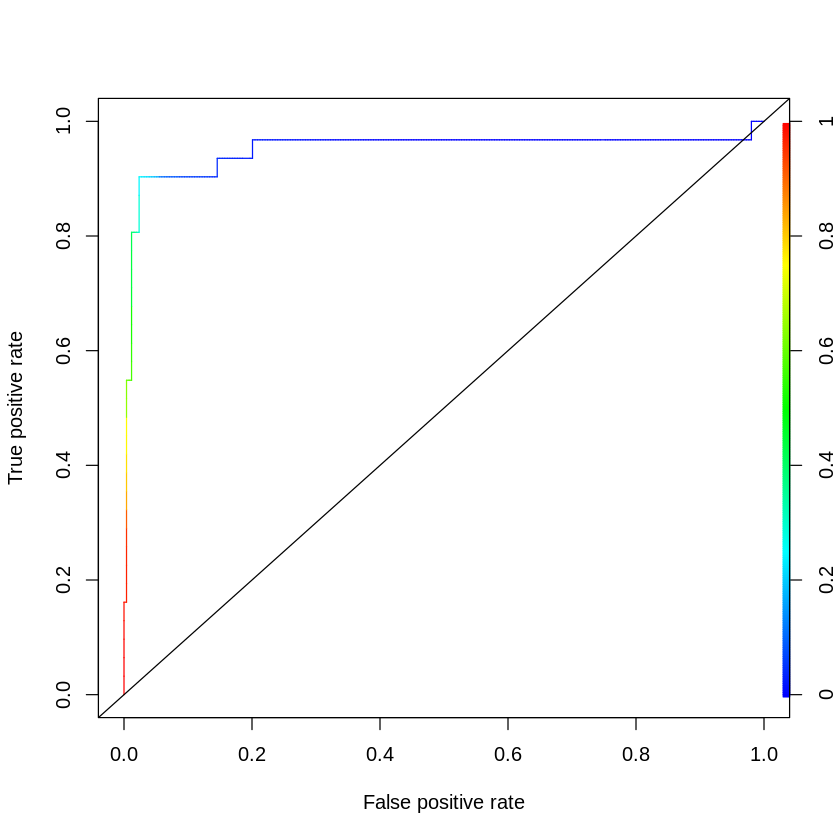

In [55]:
ROCR_predictions = prediction(probs1, pokemon_test_data$legendary)
perf <- performance(ROCR_predictions,"tpr","fpr")

plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)

In [56]:
ROCR_predictions = prediction(probs1, pokemon_test_data$legendary)

perf <- performance(ROCR_predictions,"tpr","fpr")
as.numeric(performance(ROCR_predictions,"auc")@y.values)

[1] 0.9503429

We have an AUC of 95%, which means the model is able to differentiate between two classes of legendary 0 and 1.

### Therefore, this Logistic regression model predicts the legendary status of a pokemon with an accuracy of 95%.